In [7]:
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
from scipy.stats import norm

%matplotlib inline
sns.set_style('white')
sns.set_context('talk')

In [12]:
N = 500
x = np.random.randn(N)
i = range(N)
z = [0]*N
labels = [str(i) for i in range(N)]

In [20]:
N = 10
x = np.array([norm(loc=12.,  scale=0.1).rvs() for _ in range(N)])

N = 30
y = np.array([norm(loc=10.,  scale=0.5).rvs() for _ in range(N)])

z = [x, y]

[array([ 12.08493663,  11.98961481,  12.02695302,  11.96359058,
         12.02780708,  12.03312814,  12.02050917,  12.21469719,
         12.00933508,  12.04133977]),
 array([ 10.1885183 ,   9.88336786,  10.12062116,  10.14271131,
          9.54342509,   9.53417929,  10.23661632,  10.17219371,
          9.07650112,  10.98054131,  10.44027783,  10.01723674,
          9.69464497,   9.89076625,   9.07636172,  10.57752632,
          9.97619424,   9.93849448,   9.2799687 ,  10.66407246,
         10.54054534,  10.77937317,  10.63733039,   9.59647369,
          9.4942579 ,  10.33812674,   9.89561734,   9.23853675,
          9.68884408,   9.7529785 ])]

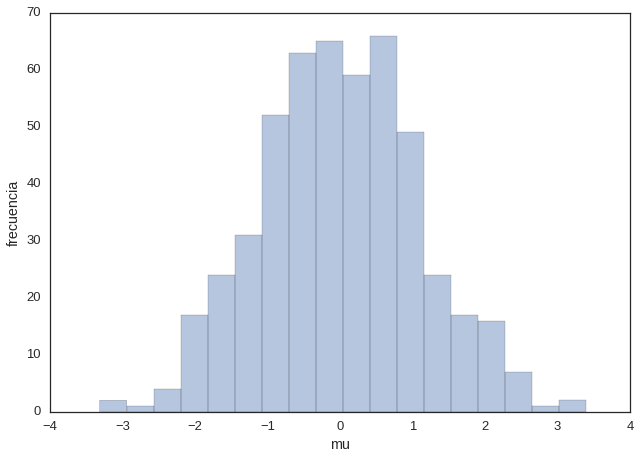

In [11]:
ax = plt.subplot()
sns.distplot(x, kde=False, ax=ax)
_ = ax.set(title='', xlabel='mu', ylabel='frecuencia');

**Savitzky-Golay filtering**

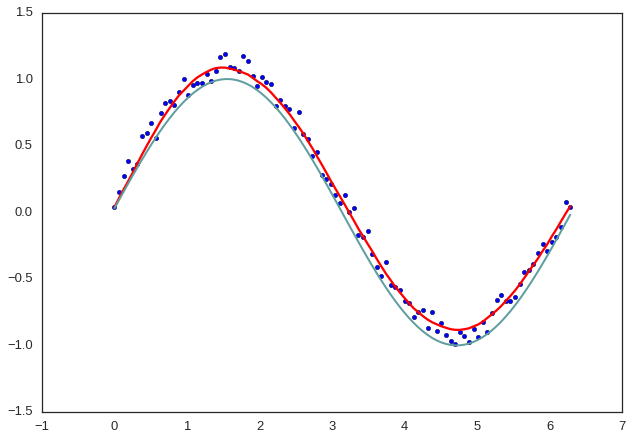

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
yhat = savitzky_golay(y, 51, 3) # window size 51, polynomial order 3

plt.scatter(x,y)
plt.plot(x,yhat, color='red')


def func(x, A, f, fi):
    return A*np.sin(f*x + fi)

fit, _ = curve_fit(func, x, y)
yy_fit = func(x, *fit)

plt.plot(x,yy_fit, color='cadetblue', lw=2)


plt.show()

+ Filtering / smoothing: we apply an operator on the data that modifies the the original y points in a way to remove high frequency oscillations. This can be achieved with for instance with scipy.signal.convolve, scipy.signal.medfilt, scipy.signal.savgol_filter or FFT based approaches.
Interpolation: we create a continuous local representation of the data from the available data-points. 
    
+ Interpolation defines how the function behaves in between the data points, but does not modify the data points themselves. See for instance scipy.interpolate.interp1d. Though, to make things more complicated spline interpolation actually also does some smoothing.
+ Curve fitting: we fit the data point by some analytical function. This allows to determine a global relationship between x and y in our data, but requires to have some previous insight regarding the suitable fitting function. See scipy.optimize.curve_fit
    

In [ ]:
import numpy

def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """ 
     
    if x.ndim != 1:
        raise ValueError, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError, "Input vector needs to be bigger than window size."
        

    if window_len<3:
        return x
    
    
    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"
    

    s=numpy.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')
    
    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y    

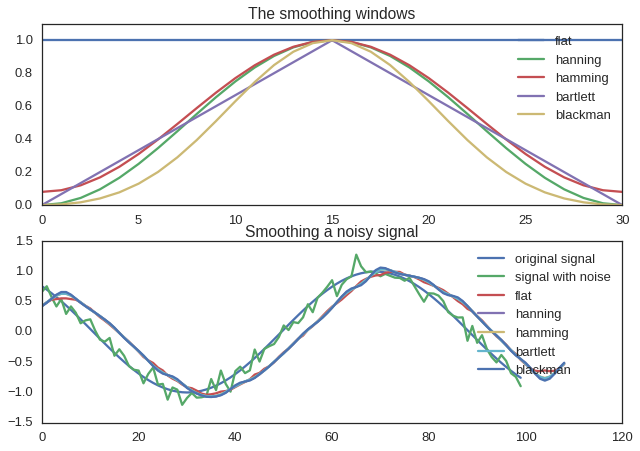

In [38]:
from numpy import *
from pylab import *   
   
t=linspace(-4,4,100)
x=sin(t)
xn=x+randn(len(t))*0.1
y=smooth(x)

subplot(211)
ws=31
plot(ones(ws))
windows=['flat', 'hanning', 'hamming', 'bartlett', 'blackman']
hold(True)
for w in windows[1:]:
    eval('plot('+w+'(ws) )')
axis([0,30,0,1.1])
legend(windows)
title("The smoothing windows")


subplot(212)
plot(x)
plot(xn)
for w in windows:
    plot(smooth(xn,10,w))
l=['original signal', 'signal with noise']
l.extend(windows)

legend(l)
title("Smoothing a noisy signal")
show()

In [42]:
def gauss_kern(size, sizey=None):
    """ Returns a normalized 2D gauss kernel array for convolutions """
    size = int(size)
    if not sizey:
        sizey = size
    else:
        sizey = int(sizey)
    x, y = mgrid[-size:size+1, -sizey:sizey+1]
    g = exp(-(x**2/float(size)+y**2/float(sizey)))
    return g / g.sum()

def blur_image(im, n, ny=None) :
    """ blurs the image by convolving with a gaussian kernel of typical
        size n. The optional keyword argument ny allows for a different
        size in the y direction.
    """
    g = gauss_kern(n, sizey=ny)
    improc = signal.convolve(im,g, mode='valid')
    return(improc)

In [43]:
from scipy import *

X, Y = mgrid[-70:70, -70:70]
Z = cos((X**2+Y**2)/200.)+ random.normal(size=X.shape)
blur_image(Z, 3)

NameError: global name 'signal' is not defined